In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [2]:
df = pd.read_csv(r"Final_data (1).csv")

In [3]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46.77,Female,98.31,1.90,199.20,148.18,63.72,0.77,761.61,Strength,...,1882.80,0.500000,0.954837,0.623413,0.743876,1865.39,71.269345,533.2558,7.924402e+19,Medium
19996,40.38,Female,88.12,1.87,196.18,134.18,54.04,1.97,2303.13,Strength,...,1205.47,0.496968,0.689060,0.563810,0.683964,173.87,65.049689,1310.6016,5.708474e+19,Low
19997,50.31,Male,46.20,1.67,163.34,157.92,61.65,1.36,1468.80,Strength,...,1947.79,0.500280,2.105844,0.946701,0.966818,-43.80,35.420708,957.9568,9.101285e+19,High
19998,52.36,Male,44.30,1.62,179.27,121.23,60.88,1.41,929.75,Yoga,...,1921.51,0.499940,2.190745,0.509756,0.676243,346.25,35.889260,928.4004,5.246436e+19,Low


In [4]:
print(df.head())

     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91    Male        65.27        1.62   188.58   157.65        69.05   
1  23.37  Female        56.41        1.55   179.43   131.75        73.18   
2  33.20  Female        58.98        1.67   175.04   123.95        54.96   
3  38.69  Female        93.78        1.70   191.21   155.10        50.07   
4  45.09    Male        52.42        1.88   193.58   152.88        70.84   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...  \
0                      1.00          1080.90     Strength  ...   
1                      1.37          1809.91         HIIT  ...   
2                      0.91           802.26       Cardio  ...   
3                      1.10          1450.79         HIIT  ...   
4                      1.08          1166.40     Strength  ...   

   cal_from_macros  pct_carbs  protein_per_kg   pct_HRR  pct_maxHR  \
0          2139.59   0.500432        1.624789  0.741237   0.835985   
1     

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

In [6]:
print(df.describe())

                Age   Weight (kg)    Height (m)       Max_BPM       Avg_BPM  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean      38.851453     73.898832      1.723093    179.889702    143.704306   
std       12.114580     21.173010      0.127033     11.510805     14.267688   
min       18.000000     39.180000      1.490000    159.310000    119.070000   
25%       28.170000     58.160000      1.620000    170.057500    131.220000   
50%       39.865000     70.000000      1.710000    180.140000    142.990000   
75%       49.630000     86.100000      1.800000    189.425000    156.060000   
max       59.670000    130.770000      2.010000    199.640000    169.840000   

        Resting_BPM  Session_Duration (hours)  Calories_Burned  \
count  20000.000000              20000.000000     20000.000000   
mean      62.195813                  1.259446      1280.109600   
std        7.289351                  0.341336       502.228982   
min       49.490000     

In [7]:
# Check missing values
print(df.isnull().sum())

Age                               0
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                   0
Workout_Type                      0
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                               0
Daily meals frequency             0
Physical exercise                 0
Carbs                             0
Proteins                          0
Fats                              0
Calories                          0
meal_name                         0
meal_type                         0
diet_type                         0
sugar_g                           0
sodium_mg                         0
cholesterol_mg                    0
serving_size_g              

In [8]:
# Drop rows with too many missing values (optional)
df = df.dropna(thresh=len(df.columns) - 3)

In [9]:
# Fill missing numerical values with median
num_cols = df.select_dtypes(include=['float64','int64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [10]:
# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [11]:
# 4. Fix Data Types
# Convert categorical columns to category type
categorical_features = ['Gender','Workout_Type','Burns_Calories_Bin']
for col in categorical_features:
    df[col] = df[col].astype('category')

In [12]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46.77,Female,98.31,1.90,199.20,148.18,63.72,0.77,761.61,Strength,...,1882.80,0.500000,0.954837,0.623413,0.743876,1865.39,71.269345,533.2558,7.924402e+19,Medium
19996,40.38,Female,88.12,1.87,196.18,134.18,54.04,1.97,2303.13,Strength,...,1205.47,0.496968,0.689060,0.563810,0.683964,173.87,65.049689,1310.6016,5.708474e+19,Low
19997,50.31,Male,46.20,1.67,163.34,157.92,61.65,1.36,1468.80,Strength,...,1947.79,0.500280,2.105844,0.946701,0.966818,-43.80,35.420708,957.9568,9.101285e+19,High
19998,52.36,Male,44.30,1.62,179.27,121.23,60.88,1.41,929.75,Yoga,...,1921.51,0.499940,2.190745,0.509756,0.676243,346.25,35.889260,928.4004,5.246436e+19,Low


In [13]:
# 5. Remove Outliers
# Example: Burns Calories per 30 min has extreme values
q_low = df['Burns Calories (per 30 min)_bc'].quantile(0.01)
q_high = df['Burns Calories (per 30 min)_bc'].quantile(0.99)
df = df[(df['Burns Calories (per 30 min)_bc'] > q_low) &
        (df['Burns Calories (per 30 min)_bc'] < q_high)]

In [14]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46.77,Female,98.31,1.90,199.20,148.18,63.72,0.77,761.61,Strength,...,1882.80,0.500000,0.954837,0.623413,0.743876,1865.39,71.269345,533.2558,7.924402e+19,Medium
19996,40.38,Female,88.12,1.87,196.18,134.18,54.04,1.97,2303.13,Strength,...,1205.47,0.496968,0.689060,0.563810,0.683964,173.87,65.049689,1310.6016,5.708474e+19,Low
19997,50.31,Male,46.20,1.67,163.34,157.92,61.65,1.36,1468.80,Strength,...,1947.79,0.500280,2.105844,0.946701,0.966818,-43.80,35.420708,957.9568,9.101285e+19,High
19998,52.36,Male,44.30,1.62,179.27,121.23,60.88,1.41,929.75,Yoga,...,1921.51,0.499940,2.190745,0.509756,0.676243,346.25,35.889260,928.4004,5.246436e+19,Low


In [15]:
# 6. Standardize Units
# Ensure height is in meters (if some values are in cm)
df['Height (m)'] = np.where(df['Height (m)'] > 3, df['Height (m)']/100, df['Height (m)'])

C:\Users\shabi\AppData\Local\Temp\ipykernel_1380\1373246655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Height (m)'] = np.where(df['Height (m)'] > 3, df['Height (m)']/100, df['Height (m)'])


In [16]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46.77,Female,98.31,1.90,199.20,148.18,63.72,0.77,761.61,Strength,...,1882.80,0.500000,0.954837,0.623413,0.743876,1865.39,71.269345,533.2558,7.924402e+19,Medium
19996,40.38,Female,88.12,1.87,196.18,134.18,54.04,1.97,2303.13,Strength,...,1205.47,0.496968,0.689060,0.563810,0.683964,173.87,65.049689,1310.6016,5.708474e+19,Low
19997,50.31,Male,46.20,1.67,163.34,157.92,61.65,1.36,1468.80,Strength,...,1947.79,0.500280,2.105844,0.946701,0.966818,-43.80,35.420708,957.9568,9.101285e+19,High
19998,52.36,Male,44.30,1.62,179.27,121.23,60.88,1.41,929.75,Yoga,...,1921.51,0.499940,2.190745,0.509756,0.676243,346.25,35.889260,928.4004,5.246436e+19,Low


In [17]:
# 7. Feature Engineering
df['BMI'] = df['Weight (kg)'] / (df['Height (m)']**2)
df['HRR'] = df['Max_BPM'] - df['Resting_BPM']
df['Efficiency'] = df['Calories_Burned'] / df['Session_Duration (hours)']

C:\Users\shabi\AppData\Local\Temp\ipykernel_1380\749224326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI'] = df['Weight (kg)'] / (df['Height (m)']**2)
C:\Users\shabi\AppData\Local\Temp\ipykernel_1380\749224326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HRR'] = df['Max_BPM'] - df['Resting_BPM']
C:\Users\shabi\AppData\Local\Temp\ipykernel_1380\749224326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [18]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin,HRR,Efficiency
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium,119.53,1080.900000
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High,106.25,1321.102190
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High,120.08,881.604396
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High,141.14,1318.900000
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low,122.74,1080.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46.77,Female,98.31,1.90,199.20,148.18,63.72,0.77,761.61,Strength,...,0.954837,0.623413,0.743876,1865.39,71.269345,533.2558,7.924402e+19,Medium,135.48,989.103896
19996,40.38,Female,88.12,1.87,196.18,134.18,54.04,1.97,2303.13,Strength,...,0.689060,0.563810,0.683964,173.87,65.049689,1310.6016,5.708474e+19,Low,142.14,1169.101523
19997,50.31,Male,46.20,1.67,163.34,157.92,61.65,1.36,1468.80,Strength,...,2.105844,0.946701,0.966818,-43.80,35.420708,957.9568,9.101285e+19,High,101.69,1080.000000
19998,52.36,Male,44.30,1.62,179.27,121.23,60.88,1.41,929.75,Yoga,...,2.190745,0.509756,0.676243,346.25,35.889260,928.4004,5.246436e+19,Low,118.39,659.397163


In [19]:
# 7. Feature Engineering
df['BMI'] = df['Weight (kg)'] / (df['Height (m)']**2)
df['HRR'] = df['Max_BPM'] - df['Resting_BPM']
df['Efficiency'] = df['Calories_Burned'] / df['Session_Duration (hours)']


C:\Users\shabi\AppData\Local\Temp\ipykernel_1380\931402493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI'] = df['Weight (kg)'] / (df['Height (m)']**2)
C:\Users\shabi\AppData\Local\Temp\ipykernel_1380\931402493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HRR'] = df['Max_BPM'] - df['Resting_BPM']
C:\Users\shabi\AppData\Local\Temp\ipykernel_1380\931402493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [20]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin,HRR,Efficiency
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium,119.53,1080.900000
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High,106.25,1321.102190
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High,120.08,881.604396
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High,141.14,1318.900000
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low,122.74,1080.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46.77,Female,98.31,1.90,199.20,148.18,63.72,0.77,761.61,Strength,...,0.954837,0.623413,0.743876,1865.39,71.269345,533.2558,7.924402e+19,Medium,135.48,989.103896
19996,40.38,Female,88.12,1.87,196.18,134.18,54.04,1.97,2303.13,Strength,...,0.689060,0.563810,0.683964,173.87,65.049689,1310.6016,5.708474e+19,Low,142.14,1169.101523
19997,50.31,Male,46.20,1.67,163.34,157.92,61.65,1.36,1468.80,Strength,...,2.105844,0.946701,0.966818,-43.80,35.420708,957.9568,9.101285e+19,High,101.69,1080.000000
19998,52.36,Male,44.30,1.62,179.27,121.23,60.88,1.41,929.75,Yoga,...,2.190745,0.509756,0.676243,346.25,35.889260,928.4004,5.246436e+19,Low,118.39,659.397163


In [21]:
# 8. Encode Categorical Variables
# Label encode Gender and Burns_Calories_Bin
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Burns_Calories_Bin'] = le.fit_transform(df['Burns_Calories_Bin'])

C:\Users\shabi\AppData\Local\Temp\ipykernel_1380\413427705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = le.fit_transform(df['Gender'])
C:\Users\shabi\AppData\Local\Temp\ipykernel_1380\413427705.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Burns_Calories_Bin'] = le.fit_transform(df['Burns_Calories_Bin'])


In [22]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin,HRR,Efficiency
0,34.91,1,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,2,119.53,1080.900000
1,23.37,0,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,0,106.25,1321.102190
2,33.20,0,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,0,120.08,881.604396
3,38.69,0,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,0,141.14,1318.900000
4,45.09,1,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,1,122.74,1080.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46.77,0,98.31,1.90,199.20,148.18,63.72,0.77,761.61,Strength,...,0.954837,0.623413,0.743876,1865.39,71.269345,533.2558,7.924402e+19,2,135.48,989.103896
19996,40.38,0,88.12,1.87,196.18,134.18,54.04,1.97,2303.13,Strength,...,0.689060,0.563810,0.683964,173.87,65.049689,1310.6016,5.708474e+19,1,142.14,1169.101523
19997,50.31,1,46.20,1.67,163.34,157.92,61.65,1.36,1468.80,Strength,...,2.105844,0.946701,0.966818,-43.80,35.420708,957.9568,9.101285e+19,0,101.69,1080.000000
19998,52.36,1,44.30,1.62,179.27,121.23,60.88,1.41,929.75,Yoga,...,2.190745,0.509756,0.676243,346.25,35.889260,928.4004,5.246436e+19,1,118.39,659.397163


In [23]:
# One-hot encode Workout_Type
df = pd.get_dummies(df, columns=['Workout_Type'], drop_first=True)

In [24]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,...,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin,HRR,Efficiency,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,34.91,1,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,26.800377,...,725.10,47.777394,685.1600,7.260425e+19,2,119.53,1080.900000,False,True,False
1,23.37,0,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,27.655021,...,-232.91,40.809803,978.6184,1.020506e+20,0,106.25,1321.102190,True,False,False
2,33.20,0,58.98,1.67,175.04,123.95,54.96,0.91,802.26,24.320821,...,805.74,44.635580,654.5266,1.079607e+20,0,120.08,881.604396,False,False,False
3,38.69,0,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,32.813572,...,1206.21,63.007432,773.6300,8.987921e+19,0,141.14,1318.900000,True,False,False
4,45.09,1,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,17.307319,...,303.60,43.347504,711.4176,5.264685e+19,1,122.74,1080.000000,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46.77,0,98.31,1.90,199.20,148.18,63.72,0.77,761.61,27.505498,...,1865.39,71.269345,533.2558,7.924402e+19,2,135.48,989.103896,False,True,False
19996,40.38,0,88.12,1.87,196.18,134.18,54.04,1.97,2303.13,26.180562,...,173.87,65.049689,1310.6016,5.708474e+19,1,142.14,1169.101523,False,True,False
19997,50.31,1,46.20,1.67,163.34,157.92,61.65,1.36,1468.80,23.331802,...,-43.80,35.420708,957.9568,9.101285e+19,0,101.69,1080.000000,False,True,False
19998,52.36,1,44.30,1.62,179.27,121.23,60.88,1.41,929.75,18.985868,...,346.25,35.889260,928.4004,5.246436e+19,1,118.39,659.397163,False,False,True


In [25]:
# 9. Normalize / Scale Features
scaler = StandardScaler()
scaled_cols = ['Age','Weight (kg)','Height (m)','Max_BPM','Avg_BPM',
               'Resting_BPM','Session_Duration (hours)','Calories_Burned',
               'BMI','HRR','Efficiency']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [26]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,...,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin,HRR,Efficiency,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,-0.330691,1,-0.395916,-0.815135,0.758331,0.988880,0.931932,-0.765768,-0.402866,26.800377,...,725.10,47.777394,685.1600,7.260425e+19,2,0.141534,0.344589,False,True,False
1,-1.281892,0,-0.825626,-1.366306,-0.038104,-0.830893,1.496491,0.315837,1.045120,27.655021,...,-232.91,40.809803,978.6184,1.020506e+20,0,-0.850453,1.422996,True,False,False
2,-0.471640,0,-0.700981,-0.421441,-0.420218,-1.378933,-0.994132,-1.028861,-0.956311,24.320821,...,805.74,44.635580,654.5266,1.079607e+20,0,0.182617,-0.550165,False,False,False
3,-0.019120,0,0.986819,-0.185225,0.987251,0.809713,-1.662582,-0.473442,0.331823,32.813572,...,1206.21,63.007432,773.6300,8.987921e+19,0,1.755753,1.413109,True,False,False
4,0.508409,1,-1.019141,1.232072,1.193541,0.653733,1.176620,-0.531907,-0.233043,17.307319,...,303.60,43.347504,711.4176,5.264685e+19,1,0.381314,0.340548,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.646886,0,1.206524,1.389550,1.682717,0.323503,0.203335,-1.438117,-1.037051,27.505498,...,1865.39,71.269345,533.2558,7.924402e+19,2,1.332964,-0.067537,False,True,False
19996,0.120181,0,0.712309,1.153334,1.419850,-0.660158,-1.119894,2.069791,2.024771,26.180562,...,173.87,65.049689,1310.6016,5.708474e+19,1,1.830451,0.740577,False,True,False
19997,0.938675,1,-1.320811,-0.421441,-1.438610,1.007851,-0.079628,0.286604,0.367595,23.331802,...,-43.80,35.420708,957.9568,9.101285e+19,0,-1.191075,0.340548,False,True,False
19998,1.107649,1,-1.412961,-0.815135,-0.052031,-1.570044,-0.184885,0.432767,-0.703086,18.985868,...,346.25,35.889260,928.4004,5.246436e+19,1,0.056378,-1.547782,False,False,True


In [27]:
# 10. Remove Duplicates
df = df.drop_duplicates()

In [28]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,...,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin,HRR,Efficiency,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,-0.330691,1,-0.395916,-0.815135,0.758331,0.988880,0.931932,-0.765768,-0.402866,26.800377,...,725.10,47.777394,685.1600,7.260425e+19,2,0.141534,0.344589,False,True,False
1,-1.281892,0,-0.825626,-1.366306,-0.038104,-0.830893,1.496491,0.315837,1.045120,27.655021,...,-232.91,40.809803,978.6184,1.020506e+20,0,-0.850453,1.422996,True,False,False
2,-0.471640,0,-0.700981,-0.421441,-0.420218,-1.378933,-0.994132,-1.028861,-0.956311,24.320821,...,805.74,44.635580,654.5266,1.079607e+20,0,0.182617,-0.550165,False,False,False
3,-0.019120,0,0.986819,-0.185225,0.987251,0.809713,-1.662582,-0.473442,0.331823,32.813572,...,1206.21,63.007432,773.6300,8.987921e+19,0,1.755753,1.413109,True,False,False
4,0.508409,1,-1.019141,1.232072,1.193541,0.653733,1.176620,-0.531907,-0.233043,17.307319,...,303.60,43.347504,711.4176,5.264685e+19,1,0.381314,0.340548,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.646886,0,1.206524,1.389550,1.682717,0.323503,0.203335,-1.438117,-1.037051,27.505498,...,1865.39,71.269345,533.2558,7.924402e+19,2,1.332964,-0.067537,False,True,False
19996,0.120181,0,0.712309,1.153334,1.419850,-0.660158,-1.119894,2.069791,2.024771,26.180562,...,173.87,65.049689,1310.6016,5.708474e+19,1,1.830451,0.740577,False,True,False
19997,0.938675,1,-1.320811,-0.421441,-1.438610,1.007851,-0.079628,0.286604,0.367595,23.331802,...,-43.80,35.420708,957.9568,9.101285e+19,0,-1.191075,0.340548,False,True,False
19998,1.107649,1,-1.412961,-0.815135,-0.052031,-1.570044,-0.184885,0.432767,-0.703086,18.985868,...,346.25,35.889260,928.4004,5.246436e+19,1,0.056378,-1.547782,False,False,True


In [29]:
# 11. Final Validation
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 19600 entries, 0 to 19999
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             19600 non-null  float64
 1   Gender                          19600 non-null  int32  
 2   Weight (kg)                     19600 non-null  float64
 3   Height (m)                      19600 non-null  float64
 4   Max_BPM                         19600 non-null  float64
 5   Avg_BPM                         19600 non-null  float64
 6   Resting_BPM                     19600 non-null  float64
 7   Session_Duration (hours)        19600 non-null  float64
 8   Calories_Burned                 19600 non-null  float64
 9   Fat_Percentage                  19600 non-null  float64
 10  Water_Intake (liters)           19600 non-null  float64
 11  Workout_Frequency (days/week)   19600 non-null  float64
 12  Experience_Level                19600

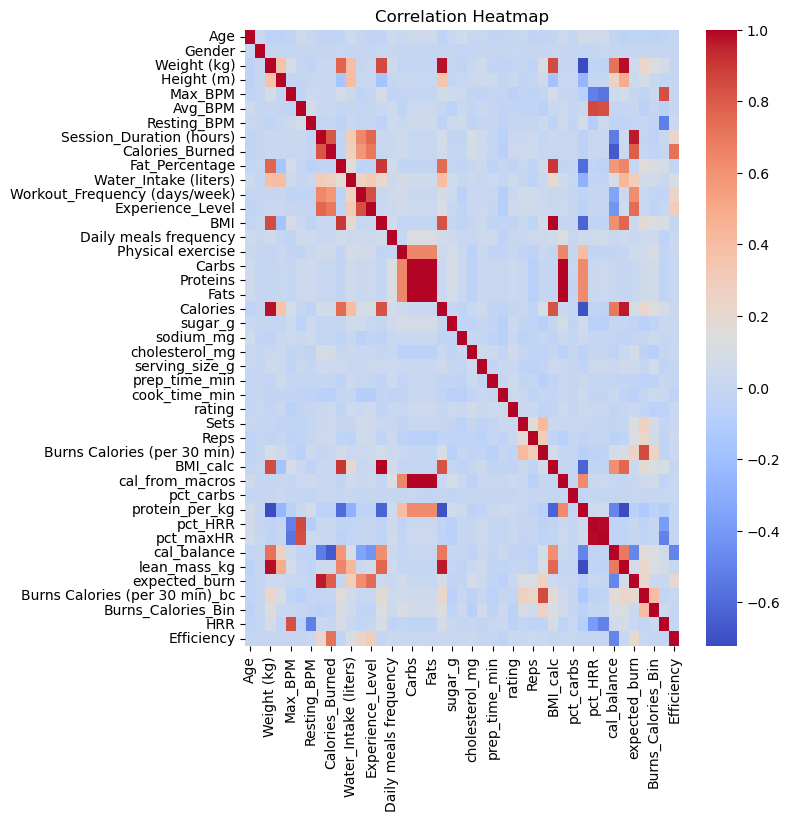

In [30]:
# Correlation heatmap
plt.figure(figsize=(7,8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [31]:
workout_effectiveness = df.groupby(['Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga'])[['Calories_Burned', 'Efficiency']].mean().reset_index()

# Map the one-hot encoded columns back to workout type names for better readability
def get_workout_type(row):
    if row['Workout_Type_HIIT'] == True:
        return 'HIIT'
    elif row['Workout_Type_Strength'] == True:
        return 'Strength'
    elif row['Workout_Type_Yoga'] == True:
        return 'Yoga'
    else:
        return 'Cardio' # Assuming Cardio is the base category if others are false

workout_effectiveness['Workout_Type'] = workout_effectiveness.apply(get_workout_type, axis=1)

# Drop the individual one-hot encoded columns if not needed for display
workout_effectiveness = workout_effectiveness.drop(columns=['Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga'])

display(workout_effectiveness.sort_values(by='Calories_Burned', ascending=False))

,Calories_Burned,Efficiency,Workout_Type
3,0.738578,1.324538,HIIT
2,0.161736,0.269364,Strength
0,-0.137781,-0.262439,Cardio
1,-0.761633,-1.329952,Yoga


C:\Users\shabi\AppData\Local\Temp\ipykernel_1380\2446076950.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Workout_Type', y='Calories_Burned', data=workout_effectiveness_sorted, ax=axes[0], palette='viridis')
C:\Users\shabi\AppData\Local\Temp\ipykernel_1380\2446076950.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Workout_Type', y='Efficiency', data=workout_effectiveness_sorted, ax=axes[1], palette='magma')


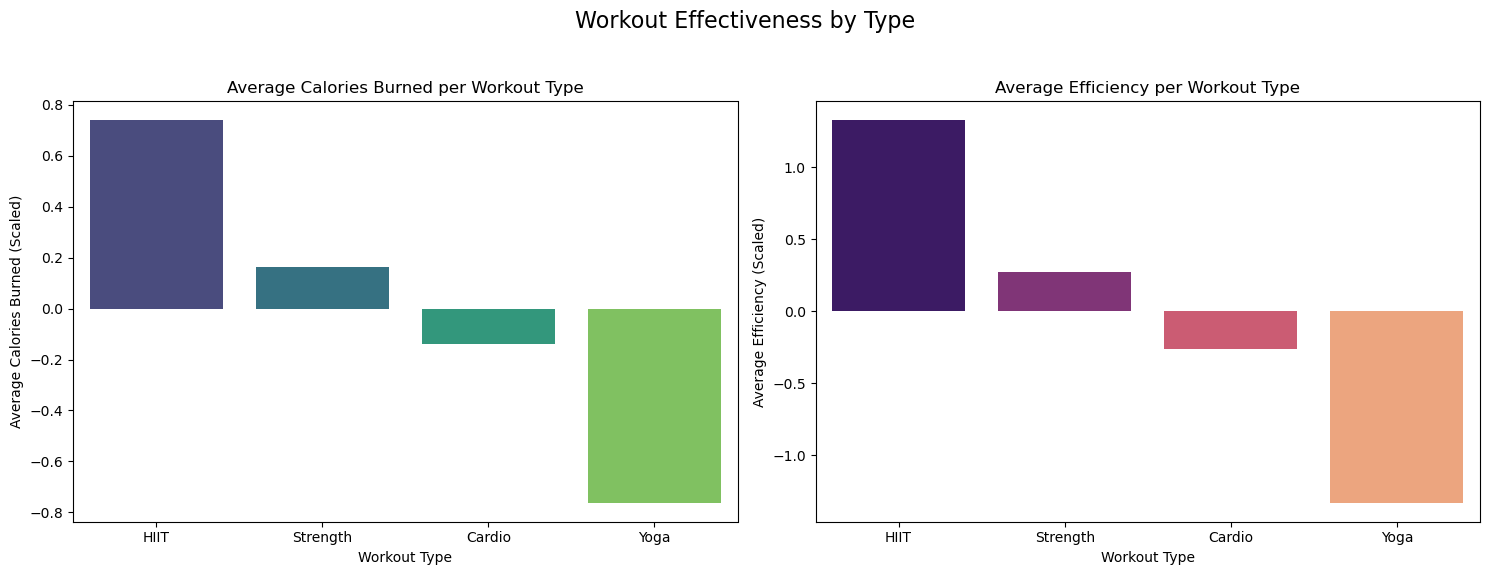

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by Calories_Burned for better visualization
workout_effectiveness_sorted = workout_effectiveness.sort_values(by='Calories_Burned', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Workout Effectiveness by Type', fontsize=16)

# Bar plot for Calories Burned
sns.barplot(x='Workout_Type', y='Calories_Burned', data=workout_effectiveness_sorted, ax=axes[0], palette='viridis')
axes[0].set_title('Average Calories Burned per Workout Type')
axes[0].set_xlabel('Workout Type')
axes[0].set_ylabel('Average Calories Burned (Scaled)')

# Bar plot for Efficiency
sns.barplot(x='Workout_Type', y='Efficiency', data=workout_effectiveness_sorted, ax=axes[1], palette='magma')
axes[1].set_title('Average Efficiency per Workout Type')
axes[1].set_xlabel('Workout Type')
axes[1].set_ylabel('Average Efficiency (Scaled)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#Key Findings:

1) HIIT Workouts Lead in Calorie Burn and Efficiency.

2) Strength Training is Highly Effective: Strength workouts follow HIIT  closely in terms of average Calories_Burned and Efficiency.

3) Cardio Provides Moderate Caloric Output: Cardio workouts show moderate levels of Calories_Burned and Efficiency.

4) Yoga's Lower Caloric Impact:This is expected as Yoga often focuses more on flexibility, balance, and mindfulness rather than intense cardiovascular or strength-based calorie burning.

5) Session Duration Influences Calorie Burn: There's a notable positive correlation between Calories_Burned and Session_Duration (hours), confirming that longer workout durations generally lead to more calories burned.

#SUGGESTION:

1) For individuals prioritizing high calorie burn and efficiency, recommend HIIT and Strength training.

2) For those focusing on flexibility, balance, or recovery, Yoga would be more appropriate.

3) Cardio can be suggested for general cardiovascular health and endurance.

In [33]:
df.to_csv('cleaned_data.csv',index=False)